# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, svm, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 2. Read the dataset

In [2]:
df = pd.read_csv('tweets.csv')
df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    int64 
 1   author  400 non-null    object
 2   status  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


# 3. Split the dataset into X and y

In [4]:
X = df.status
y = df.author

# 4. Split the dataset into training set and testing set

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [6]:
cvec = CountVectorizer(stop_words="english", max_df=0.9, min_df=0.05)
c_train=cvec.fit_transform(x_train)
c_test=cvec.transform(x_test)

In [7]:
tvec= TfidfVectorizer(stop_words="english", max_df=0.9, min_df=0.05)
t_train=tvec.fit_transform(x_train)
t_test=tvec.transform(x_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [8]:
# using tfidf
logclassifier=LogisticRegression(random_state=0, solver='lbfgs') 
logclassifier.fit(t_train, y_train) 

LogisticRegression(random_state=0)

In [9]:
# using count
logclassifier=LogisticRegression(random_state=0, solver='lbfgs')
logclassifier.fit(c_train, y_train)


LogisticRegression(random_state=0)

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [10]:
# using tfidf
svclassifier = SVC(kernel='rbf')
svclassifier.fit(c_train, y_train)

SVC()

In [11]:
# using count
svclassifier = SVC(kernel='rbf')
svclassifier.fit(c_train, y_train)

SVC()

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [12]:
t_predlog = logclassifier.predict(t_test)
c_predlog = logclassifier.predict(c_test)


countlogacc = accuracy_score(c_predlog,y_test)
print(confusion_matrix(y_test,c_predlog))
print(classification_report(y_test,c_predlog))

countlogacc = accuracy_score(t_predlog,y_test)
print(confusion_matrix(y_test,t_predlog))
print(classification_report(y_test,t_predlog))
     


[[39  7]
 [ 5 29]]
                 precision    recall  f1-score   support

Donald J. Trump       0.89      0.85      0.87        46
 Justin Trudeau       0.81      0.85      0.83        34

       accuracy                           0.85        80
      macro avg       0.85      0.85      0.85        80
   weighted avg       0.85      0.85      0.85        80

[[45  1]
 [11 23]]
                 precision    recall  f1-score   support

Donald J. Trump       0.80      0.98      0.88        46
 Justin Trudeau       0.96      0.68      0.79        34

       accuracy                           0.85        80
      macro avg       0.88      0.83      0.84        80
   weighted avg       0.87      0.85      0.84        80



In [13]:
# SVC prediction , accuracy, 
t_predsvc = svclassifier.predict(t_test)
c_predsvc = svclassifier.predict(c_test)

countsvcacc = accuracy_score(c_predsvc,y_test)
print(confusion_matrix(y_test,c_predsvc))
print(classification_report(y_test,c_predsvc))

tfidfsvmacc = accuracy_score(t_predsvc,y_test)
print(confusion_matrix(y_test,t_predsvc))
print(classification_report(y_test,t_predsvc))
     


[[39  7]
 [ 5 29]]
                 precision    recall  f1-score   support

Donald J. Trump       0.89      0.85      0.87        46
 Justin Trudeau       0.81      0.85      0.83        34

       accuracy                           0.85        80
      macro avg       0.85      0.85      0.85        80
   weighted avg       0.85      0.85      0.85        80

[[43  3]
 [10 24]]
                 precision    recall  f1-score   support

Donald J. Trump       0.81      0.93      0.87        46
 Justin Trudeau       0.89      0.71      0.79        34

       accuracy                           0.84        80
      macro avg       0.85      0.82      0.83        80
   weighted avg       0.84      0.84      0.83        80



# 9. Plot a confusion matrix for both Logistic Regression and SVM

In [14]:
tlog_confmatrix = confusion_matrix(t_predlog,y_test)
clog_confmatrix = confusion_matrix(c_predlog,y_test)
print(tlog_confmatrix)
print(clog_confmatrix)

[[45 11]
 [ 1 23]]
[[39  5]
 [ 7 29]]


<Axes: >

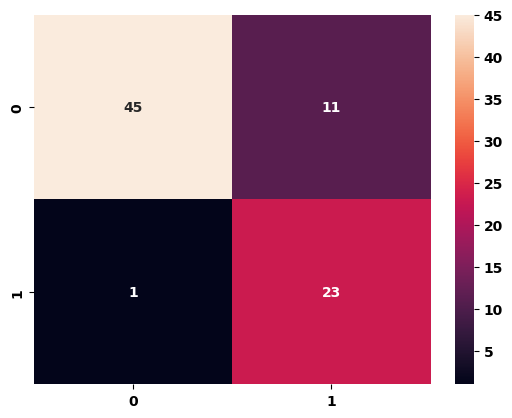

In [15]:
sns.heatmap(tlog_confmatrix, annot=True)

<Axes: >

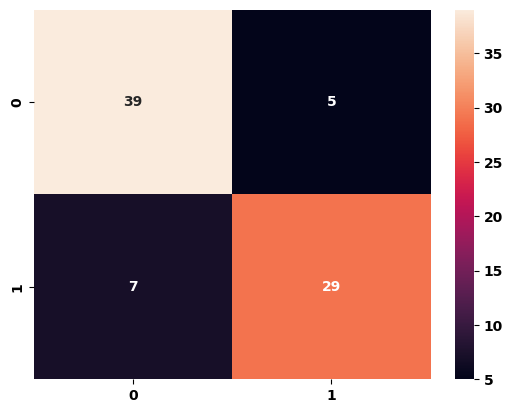

In [16]:
sns.heatmap(clog_confmatrix, annot=True)

In [17]:
tsvc_confmatrix = confusion_matrix(t_predsvc,y_test)
csvc_confmatrix = confusion_matrix(c_predsvc,y_test)
print(csvc_confmatrix)
print(tsvc_confmatrix)

[[39  5]
 [ 7 29]]
[[43 10]
 [ 3 24]]


<Axes: >

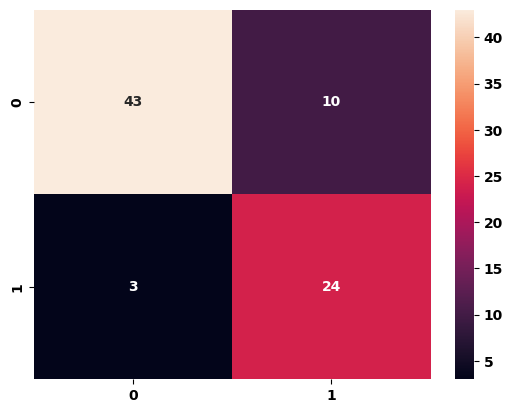

In [18]:
sns.heatmap(tsvc_confmatrix, annot=True)

<Axes: >

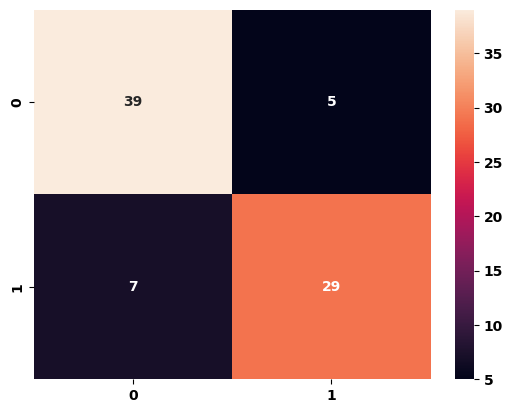

In [19]:
sns.heatmap(csvc_confmatrix, annot=True)